In [121]:
import requests

In [122]:
from bs4 import BeautifulSoup

In [123]:
import pandas as pd

In [124]:
response = requests.get("https://klimi.mk/")

In [125]:
response

<Response [200]>

In [126]:

print(response.text[:512])

<!doctype html>
<html lang="en">
<head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
                <meta property="fb:app_id" content="308558492587260" />
        <meta property="og:url" content="https://klimi.mk" />
        <meta property="og:image" content="https://klimi.mk/public/storage/main/fb.png" />
        <meta property="og:title" content="КЛИМИ.мк - резиденцијални и комерцијални клима уреди" />
        <meta property="og:type" content="artic


In [127]:
soup = BeautifulSoup(response.text, "html.parser")

In [128]:
manufacturer_elements = soup.select(".proizvoditel")

In [129]:
manufacturer_elements

[<input class="custom-control-input proizvoditel" id="gree" name="" type="checkbox" value="6"/>,
 <input class="custom-control-input proizvoditel" id="vivax" name="" type="checkbox" value="8"/>,
 <input class="custom-control-input proizvoditel" id="hisense" name="" type="checkbox" value="52"/>,
 <input class="custom-control-input proizvoditel" id="toshiba" name="" type="checkbox" value="45"/>,
 <input class="custom-control-input proizvoditel" id="tesla" name="" type="checkbox" value="39"/>,
 <input class="custom-control-input proizvoditel" id="carrier" name="" type="checkbox" value="49"/>,
 <input class="custom-control-input proizvoditel" id="haier" name="" type="checkbox" value="44"/>,
 <input class="custom-control-input proizvoditel" id="fujitsu" name="" type="checkbox" value="57"/>,
 <input class="custom-control-input proizvoditel" id="samsung" name="" type="checkbox" value="43"/>,
 <input class="custom-control-input proizvoditel" id="daikin" name="" type="checkbox" value="42"/>,
 <

In [130]:
manufacturers = [
    manufacturer_element.get("id") for manufacturer_element in manufacturer_elements
]

In [131]:
manufacturers

['gree',
 'vivax',
 'hisense',
 'toshiba',
 'tesla',
 'carrier',
 'haier',
 'fujitsu',
 'samsung',
 'daikin',
 'mitsubishi',
 'aux',
 'tosot',
 'hitachi',
 'hyundai',
 'tcl',
 'bosch',
 'vaillant']

In [132]:
slider_element = soup.select_one("#slider")

In [133]:
print(str(slider_element)[:512])

<section id="slider"><!--slider-->
<div class="carousel slide div-slajder" data-ride="carousel" id="carousel-example-generic">
<!-- Indicators -->
<ol class="carousel-indicators">
<li class="active" data-slide-to="0" data-target="#carousel-example-generic"></li>
<li class="" data-slide-to="1" data-target="#carousel-example-generic"></li>
<li class="" data-slide-to="2" data-target="#carousel-example-generic"></li>
<li class="" data-slide-to="3" data-target="#carousel-example-generic"></li>
<li class="" data-


In [134]:
image_elements = slider_element.select("img.img.img-fluid.slika-klima-slajder")

In [135]:
len(image_elements)

20

In [136]:
print(image_elements[0])

<img alt="" class="img img-fluid slika-klima-slajder" src="https://klimi.mk/public/storage/proizvodi/O2AnygmaFsCeFxo6M85Fd5WpkNSzDjJPMCTv3u9C.png"/>


In [137]:
image_elements[0].get("src")

'https://klimi.mk/public/storage/proizvodi/O2AnygmaFsCeFxo6M85Fd5WpkNSzDjJPMCTv3u9C.png'

In [138]:
len(image_elements)

20

In [139]:
container = soup.select_one(".sodrzina-klimi-naslovna")

In [140]:
print(str(container)[:512])

<div class="sodrzina-klimi-naslovna">
<!-- -->
<div class="col-md-12 row klimi-red" id="proizvodi-data">
<div class="col-md-4 col-sm-6 klima-box ramka-promo-cena">
<div class="header-box">
<img alt="ACP-12CH35AEFIs R32" class="image img-fluid slika-klima-box" src="https://klimi.mk/public/storage/proizvodi/1AF1VBpEoWQJPptxaOHpC7nWp6yYnPwlIDoB6awL.png"/>
</div>
<div class="proizvoditel-model">
<img align="left" alt="VIVAX" class="logo-box-klima" src="https://klimi.mk/public/storage/proizvoditeli/vivax-bw.png"


In [141]:
rows = container.select(".klimi-red")

In [142]:
len(rows)

2

In [143]:
print(str(rows[0])[:512])

<div class="col-md-12 row klimi-red" id="proizvodi-data">
<div class="col-md-4 col-sm-6 klima-box ramka-promo-cena">
<div class="header-box">
<img alt="ACP-12CH35AEFIs R32" class="image img-fluid slika-klima-box" src="https://klimi.mk/public/storage/proizvodi/1AF1VBpEoWQJPptxaOHpC7nWp6yYnPwlIDoB6awL.png"/>
</div>
<div class="proizvoditel-model">
<img align="left" alt="VIVAX" class="logo-box-klima" src="https://klimi.mk/public/storage/proizvoditeli/vivax-bw.png"/>
<span class="opis-model">ACP-12CH35AEFIs R32


In [144]:
cells = []
for row in rows:
    cells.extend(row.select(".klima-box"))

In [145]:
len(cells)

9

In [146]:
print(cells[0])

<div class="col-md-4 col-sm-6 klima-box ramka-promo-cena">
<div class="header-box">
<img alt="ACP-12CH35AEFIs R32" class="image img-fluid slika-klima-box" src="https://klimi.mk/public/storage/proizvodi/1AF1VBpEoWQJPptxaOHpC7nWp6yYnPwlIDoB6awL.png"/>
</div>
<div class="proizvoditel-model">
<img align="left" alt="VIVAX" class="logo-box-klima" src="https://klimi.mk/public/storage/proizvoditeli/vivax-bw.png"/>
<span class="opis-model">ACP-12CH35AEFIs R32</span>
</div>
<div class="osnovni-podatoci-div">
<span class="osnovni-info"><b>ТИП</b>: ИНВЕРТЕР СПЛИТ СИСТЕМ</span>
<span class="osnovni-info"><b>ЕНЕРГЕТСКА КЛАСА</b>: A++ </span>
<span class="osnovni-info"><b>МОЌНОСТ</b>: 3517/3810 W</span>
<span class="osnovni-info"><b>ГРЕЕЊЕ / ЛАДЕЊЕ</b>: ОД -10℃ ДО 50℃</span>
<span class="osnovni-info"><b>ПРЕПОРАЧАНА ПОВРШИНА</b>: <span style="color: #090037;">ДО 30 м<sup>2</sup></span></span>
<span class="osnovni-info info-funkcii" title="Внесете свежина во вашите домашни и деловни простории и во нај

In [147]:
manufacturer_details = cells[0].select_one(".proizvoditel-model")

In [148]:
manufacturer_details.select_one("img").get("alt")

'VIVAX'

In [149]:
manufacturer_details.select_one(".opis-model").text

'ACP-12CH35AEFIs R32'

In [150]:
def get_manufacturer_details(cell):
    manufacturer_details = cell.select_one(".proizvoditel-model")
    brand = manufacturer_details.select_one("img").get("alt")
    model = manufacturer_details.select_one(".opis-model").text
    return {"brand": brand, "model": model}

In [151]:
get_manufacturer_details(cells[0])

{'brand': 'VIVAX', 'model': 'ACP-12CH35AEFIs R32'}

In [152]:
properties = cells[0].select(".osnovni-info")

In [153]:
names = [
    "type",
    "energy_class",
    "power",
    "temperature",
    "area",
    "functions",
    "guarantee",
]

In [154]:
info = {}
for index in range(len(names)):
    name = names[index]
    parts = properties[index].text.split(":")
    info[name] = parts[1].strip()

In [155]:
info

{'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
 'energy_class': 'A++',
 'power': '3517/3810 W',
 'temperature': 'ОД -10℃ ДО 50℃',
 'area': 'ДО 30 м2',
 'functions': 'Внесете свежина во вашите домашни и деловни простории и во најтешките летни денови!',
 'guarantee': '5 ГОДИНИ'}

In [156]:
def get_info(cell):
    properties = cell.select(".osnovni-info")

    info = {}
    for index in range(len(names)):
        name = names[index]
        parts = properties[index].text.split(":")
        info[name] = parts[1].strip()

    return info

In [157]:
get_info(cells[0])

{'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
 'energy_class': 'A++',
 'power': '3517/3810 W',
 'temperature': 'ОД -10℃ ДО 50℃',
 'area': 'ДО 30 м2',
 'functions': 'Внесете свежина во вашите домашни и деловни простории и во најтешките летни денови!',
 'guarantee': '5 ГОДИНИ'}

In [158]:
curr_price_element = cells[0].select_one(".cena-box-naslovna")

In [159]:
curr_price_element

<span class="cena-box-naslovna" style="color: #ffffff !important;">17.990<sup>00</sup></span>

In [160]:
curr_price = curr_price_element.contents[0]

In [161]:
curr_price

'17.990'

In [162]:
curr_price = curr_price_element.contents[1]

In [163]:
curr_price

<sup>00</sup>

In [164]:
prev_price_element = cells[0].select_one(".stara-cena-linija")

In [165]:
prev_price_element

<span class="stara-cena-linija" style="color: #ffffff; font-size: 1.4em; position: relative; bottom: -24px;">20.990<sup>00</sup></span>

In [166]:
prev_price = prev_price_element.contents[0] if prev_price_element else None

In [167]:
print("Previous price element:", prev_price_element)
print("Previous price:", prev_price)

Previous price element: <span class="stara-cena-linija" style="color: #ffffff; font-size: 1.4em; position: relative; bottom: -24px;">20.990<sup>00</sup></span>
Previous price: 20.990


In [168]:
def get_price(cell):
    curr_price_element = cell.select_one(".cena-box-naslovna")
    curr_price = curr_price_element.contents[0]
    prev_price_element = cell.select_one(".stara-cena-linija")
    prev_price = prev_price_element.contents[0] if prev_price_element else None
    return {"curr_price": curr_price, "prev_price": prev_price}

In [169]:
print(get_price(cells[0]))

{'curr_price': '17.990', 'prev_price': '20.990'}


In [170]:
get_price(cells[0])

{'curr_price': '17.990', 'prev_price': '20.990'}

In [171]:
def get_cell_data(cell):
    dictionary = {}

    manufacturer_details = get_manufacturer_details(cell)
    dictionary.update(manufacturer_details)

    info = get_info(cell)
    dictionary.update(info)

    price = get_price(cell)
    dictionary.update(price)

    return dictionary

In [172]:
print(get_cell_data(cells[0]))


{'brand': 'VIVAX', 'model': 'ACP-12CH35AEFIs R32', 'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ', 'energy_class': 'A++', 'power': '3517/3810 W', 'temperature': 'ОД -10℃ ДО 50℃', 'area': 'ДО 30 м2', 'functions': 'Внесете свежина во вашите домашни и деловни простории и во најтешките летни денови!', 'guarantee': '5 ГОДИНИ', 'curr_price': '17.990', 'prev_price': '20.990'}


In [173]:
data = []
for cell in cells:
    data.append(get_cell_data(cell))

In [174]:
data[:3]

[{'brand': 'VIVAX',
  'model': 'ACP-12CH35AEFIs R32',
  'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
  'energy_class': 'A++',
  'power': '3517/3810 W',
  'temperature': 'ОД -10℃ ДО 50℃',
  'area': 'ДО 30 м2',
  'functions': 'Внесете свежина во вашите домашни и деловни простории и во најтешките летни денови!',
  'guarantee': '5 ГОДИНИ',
  'curr_price': '17.990',
  'prev_price': '20.990'},
 {'brand': 'TESLA',
  'model': 'CLASSIC TA36FFLL-1232IA',
  'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
  'energy_class': 'A++',
  'power': '3400/3500 W',
  'temperature': 'ОД -15℃ ДО 49℃',
  'area': 'ДО 35 м2',
  'functions': '/',
  'guarantee': '3 ГОДИНИ',
  'curr_price': '18.990',
  'prev_price': None},
 {'brand': 'VIVAX',
  'model': 'ACP-12CH35AEXIs R32',
  'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
  'energy_class': 'A++',
  'power': '3520/3810 W',
  'temperature': 'ОД -15℃ ДО 50℃',
  'area': 'ДО 30 м2',
  'functions': '/',
  'guarantee': '5 ГОДИНИ',
  'curr_price': '19.990',
  'prev_price': '24.990'}]

In [175]:
df = pd.DataFrame(data)

In [176]:
df

,brand,model,type,energy_class,power,temperature,area,functions,guarantee,curr_price,prev_price
0,VIVAX,ACP-12CH35AEFIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3517/3810 W,ОД -10℃ ДО 50℃,ДО 30 м2,Внесете свежина во вашите домашни и деловни пр...,5 ГОДИНИ,17.990,20.990
1,TESLA,CLASSIC TA36FFLL-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3400/3500 W,ОД -15℃ ДО 49℃,ДО 35 м2,/,3 ГОДИНИ,18.990,None
2,VIVAX,ACP-12CH35AEXIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3520/3810 W,ОД -15℃ ДО 50℃,ДО 30 м2,/,5 ГОДИНИ,19.990,24.990
3,VIVAX,ACP-09CH25AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,2638/2930 W,ОД -15℃ ДО 50℃,ДО 25 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,19.990,22.990
4,VIVAX,ACP-09PT25AEG,МОБИЛНИ КЛИМА УРЕДИ,A,2640 W,ОД 17℃ ДО 35℃,ДО 25 м2,"Тајмер, 3 стапки на проток на воздух, Рачно ра...",3 ГОДИНИ,19.990,None
5,TOSOT,MUSE PREMIUM TWH12AFBXB-K6DNA5A,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3200/3400 W,ОД -15℃ ДО 43℃,ДО 30 м2,"Произведено од GREE. Самодијагноза, интелегент...",3 ГОДИНИ,19.990,31.990
6,VIVAX,ACP-09CH25AEMIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,2638/2930 W,ОД -15℃ ДО 50℃,ДО 25 м2,"Висока ефикасност, самодијагноза, 1W standby, ...",5 ГОДИНИ,19.990,24.990
7,VIVAX,ACP-12CH35AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3517/3810 W,ОД -15℃ ДО 50℃,ДО 35 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,20.990,25.990
8,TESLA,CLASSIC TT34EX21-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3400/3420 W,ОД -20℃ ДО 53℃,ДО 35 м2,/,3 ГОДИНИ,20.990,25.990


In [177]:
df["brand"].unique()

array(['VIVAX', 'TESLA', 'TOSOT'], dtype=object)

In [184]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

In [185]:
driver.get("https://klimi.mk/")

In [193]:
last_height = driver.execute_script("return document.body.scrollHeight;")

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    time.sleep(3)
    
    new_height = driver.execute_script("return document.body.scrollHeight;")
    
    if new_height == last_height:
        break
    last_height = new_height

In [195]:
grid_element = driver.find_element(By.CLASS_NAME, "sodrzina-klimi-naslovna")

In [196]:
row_elements = grid_element.find_elements(By.CLASS_NAME, "klimi-red")

In [197]:
len(row_elements)

33

In [198]:
cell_elements = []
for row_element in row_elements:
    curr_cell_elements = row_element.find_elements(By.CLASS_NAME, "klima-box")
    cell_elements.extend(curr_cell_elements)

In [199]:
len(cell_elements)

286

In [200]:
curr_price_element = cell_elements[0].find_element(By.CLASS_NAME, "cena-box-naslovna")

In [201]:
curr_price = driver.execute_script("return arguments[0].firstChild.nodeValue;", curr_price_element)

In [202]:
curr_price

'17.990'

In [203]:
prev_price_element = cell_elements[0].find_element(By.CLASS_NAME, "stara-cena-linija")

In [204]:
prev_price

'20.990'

In [205]:
print(cell_elements[0].get_attribute("outerHTML"))

<div class="col-md-4 col-sm-6 klima-box   ramka-promo-cena  ">
                                        <div class="header-box">
                                            <img src="https://klimi.mk/public/storage/proizvodi/1AF1VBpEoWQJPptxaOHpC7nWp6yYnPwlIDoB6awL.png" alt="ACP-12CH35AEFIs R32" class="image img-fluid slika-klima-box">
                                        </div>
                    <div class="proizvoditel-model">
                        <img src="https://klimi.mk/public/storage/proizvoditeli/vivax-bw.png" alt="VIVAX" align="left" class="logo-box-klima">
                        <span class="opis-model">ACP-12CH35AEFIs R32</span>
                    </div>
                    <div class="osnovni-podatoci-div">
                        <span class="osnovni-info"><b>ТИП</b>: ИНВЕРТЕР СПЛИТ СИСТЕМ</span>
                                                    <span class="osnovni-info"><b>ЕНЕРГЕТСКА КЛАСА</b>: A++ </span>
                                                <span 

In [206]:
data = []

In [207]:
for cell_element in cell_elements:
    outer_html = cell_element.get_attribute("outerHTML")
    soup = BeautifulSoup(outer_html, "html.parser")
    data.append(get_cell_data(soup))

In [208]:
data

[{'brand': 'VIVAX',
  'model': 'ACP-12CH35AEFIs R32',
  'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
  'energy_class': 'A++',
  'power': '3517/3810 W',
  'temperature': 'ОД -10℃ ДО 50℃',
  'area': 'ДО 30 м2',
  'functions': 'Внесете свежина во вашите домашни и деловни простории и во најтешките летни денови!',
  'guarantee': '5 ГОДИНИ',
  'curr_price': '17.990',
  'prev_price': '20.990'},
 {'brand': 'TESLA',
  'model': 'CLASSIC TA36FFLL-1232IA',
  'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
  'energy_class': 'A++',
  'power': '3400/3500 W',
  'temperature': 'ОД -15℃ ДО 49℃',
  'area': 'ДО 35 м2',
  'functions': '/',
  'guarantee': '3 ГОДИНИ',
  'curr_price': '18.990',
  'prev_price': None},
 {'brand': 'VIVAX',
  'model': 'ACP-12CH35AEXIs R32',
  'type': 'ИНВЕРТЕР СПЛИТ СИСТЕМ',
  'energy_class': 'A++',
  'power': '3520/3810 W',
  'temperature': 'ОД -15℃ ДО 50℃',
  'area': 'ДО 30 м2',
  'functions': '/',
  'guarantee': '5 ГОДИНИ',
  'curr_price': '19.990',
  'prev_price': '24.990'},
 {'brand': 'VIVAX',
  'mode

In [209]:
driver.quit()

In [210]:
df = pd.DataFrame(data)

In [211]:
df

,brand,model,type,energy_class,power,temperature,area,functions,guarantee,curr_price,prev_price
0,VIVAX,ACP-12CH35AEFIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3517/3810 W,ОД -10℃ ДО 50℃,ДО 30 м2,Внесете свежина во вашите домашни и деловни пр...,5 ГОДИНИ,17.990,20.990
1,TESLA,CLASSIC TA36FFLL-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3400/3500 W,ОД -15℃ ДО 49℃,ДО 35 м2,/,3 ГОДИНИ,18.990,None
2,VIVAX,ACP-12CH35AEXIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,3520/3810 W,ОД -15℃ ДО 50℃,ДО 30 м2,/,5 ГОДИНИ,19.990,24.990
3,VIVAX,ACP-09CH25AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,2638/2930 W,ОД -15℃ ДО 50℃,ДО 25 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,19.990,22.990
4,VIVAX,ACP-09PT25AEG,МОБИЛНИ КЛИМА УРЕДИ,A,2640 W,ОД 17℃ ДО 35℃,ДО 25 м2,"Тајмер, 3 стапки на проток на воздух, Рачно ра...",3 ГОДИНИ,19.990,None
...,...,...,...,...,...,...,...,...,...,...,...
281,VIVAX,ACP-55DT160AERI+ R32,КАНАЛНИ СИСТЕМИ,A++,15240/18170 W,ОД -20℃ ДО 50℃,ДО 170 м2,/,5 ГОДИНИ,199.990,None
282,VIVAX,ACP-55FS160AERI R410A,САМОСТОЕЧКИ,A++,16120/17000 W,ОД -15℃ ДО 50℃,ДО 170 м2,/,5 ГОДИНИ,199.990,None
283,MITSUBISHI,Heavy Diamond Hyperinverter SRK/SRC 100 ZR-W,ИНВЕРТЕР СПЛИТ СИСТЕМ,A+,9600/10000 W,ОД -15℃ ДО 46℃,ДО 100 м2,• Серијата ZR е идеално решение за греење и ла...,3 ГОДИНИ,205.590,None
284,TOSHIBA,Inverter RAV-RM1401FT / RAV-GM1401ATP-E,САМОСТОЕЧКИ,A,14000/14600 W,ОД -15℃ ДО 46℃,ДО 140 м2,Екстремно тивок и штедлив клима уред\nА/ А ене...,3 ГОДИНИ,249.990,None


In [212]:
df.to_csv("raw_data.csv", index=False)

In [213]:
import re

In [214]:
import numpy as np

In [215]:
df = pd.read_csv("raw_data.csv", dtype=str)

In [216]:
df["brand"].unique()

array(['VIVAX', 'TESLA', 'TOSOT', 'GREE', 'TCL', 'AUX', 'HISENSE',
       'HAIER', 'BOSCH', 'CARRIER', 'SAMSUNG', 'VAILLANT', 'TOSHIBA',
       'HITACHI', 'FUJITSU', 'MITSUBISHI', 'DAIKIN', 'HYUNDAI'],
      dtype=object)

In [217]:
df["type"].unique()

array(['ИНВЕРТЕР СПЛИТ СИСТЕМ', 'МОБИЛНИ КЛИМА УРЕДИ',
       'СТАНДАРД СПЛИТ СИСТЕМ', 'ПАРАПЕТНИ/КОНЗОЛНИ',
       'КАСЕТНИ СПЛИТ СИСТЕМ', 'КАНАЛНИ СИСТЕМИ', 'САМОСТОЕЧКИ'],
      dtype=object)

In [218]:
df["energy_class"].unique()

array(['A++', 'A', 'A+++', 'A+'], dtype=object)

In [219]:
text = "2700/3000 W"

In [220]:
numbers = re.findall(r"\d+", text)

In [221]:
def preprocess_power(power):
    numbers = re.findall(r"\d+", power)
    if len(numbers) == 1:
        return numbers * 2
    return numbers

In [222]:
df[["min_power", "max_power"]] = df["power"].apply(preprocess_power).tolist()

In [223]:
df["min_power"] = df["min_power"].astype(int)

In [224]:
df["max_power"] = df["max_power"].astype(int)

In [225]:
df.drop(columns=["power"], inplace=True)

In [226]:
text = "ОД -10℃ ДО 50℃"

In [227]:
numbers = re.findall(r"-?\d+", text)

In [228]:
numbers

['-10', '50']

In [230]:
df[["min_temp", "max_temp"]] = df["temperature"].apply(lambda text: re.findall(r"-?\d+", text)).tolist()

In [231]:
df["min_temp"] = df["min_temp"].astype(int)

In [232]:
df["max_temp"] = df["max_temp"].astype(int)

In [233]:
df.drop(columns=["temperature"], inplace=True)

In [234]:
df

,brand,model,type,energy_class,area,functions,guarantee,curr_price,prev_price,min_power,max_power,min_temp,max_temp
0,VIVAX,ACP-12CH35AEFIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ДО 30 м2,Внесете свежина во вашите домашни и деловни пр...,5 ГОДИНИ,17.990,20.990,3517,3810,-10,50
1,TESLA,CLASSIC TA36FFLL-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ДО 35 м2,/,3 ГОДИНИ,18.990,NaN,3400,3500,-15,49
2,VIVAX,ACP-12CH35AEXIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ДО 30 м2,/,5 ГОДИНИ,19.990,24.990,3520,3810,-15,50
3,VIVAX,ACP-09CH25AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,ДО 25 м2,"Висока ефикасност, прикажување на самодијагноз...",5 ГОДИНИ,19.990,22.990,2638,2930,-15,50
4,VIVAX,ACP-09PT25AEG,МОБИЛНИ КЛИМА УРЕДИ,A,ДО 25 м2,"Тајмер, 3 стапки на проток на воздух, Рачно ра...",3 ГОДИНИ,19.990,NaN,2640,2640,17,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,VIVAX,ACP-55DT160AERI+ R32,КАНАЛНИ СИСТЕМИ,A++,ДО 170 м2,/,5 ГОДИНИ,199.990,NaN,15240,18170,-20,50
282,VIVAX,ACP-55FS160AERI R410A,САМОСТОЕЧКИ,A++,ДО 170 м2,/,5 ГОДИНИ,199.990,NaN,16120,17000,-15,50
283,MITSUBISHI,Heavy Diamond Hyperinverter SRK/SRC 100 ZR-W,ИНВЕРТЕР СПЛИТ СИСТЕМ,A+,ДО 100 м2,• Серијата ZR е идеално решение за греење и ла...,3 ГОДИНИ,205.590,NaN,9600,10000,-15,46
284,TOSHIBA,Inverter RAV-RM1401FT / RAV-GM1401ATP-E,САМОСТОЕЧКИ,A,ДО 140 м2,Екстремно тивок и штедлив клима уред\nА/ А ене...,3 ГОДИНИ,249.990,NaN,14000,14600,-15,46


In [235]:
df["area"] = df["area"].apply(lambda text: re.findall(r"\d+", text)[0])

In [236]:
df["area"] = df["area"].astype(int)

In [237]:
df["guarantee"] = df["guarantee"].apply(lambda text: re.findall(r"\d+", text)[0])

In [238]:
df["guarantee"] = df["guarantee"].astype(int)

In [239]:
df

,brand,model,type,energy_class,area,functions,guarantee,curr_price,prev_price,min_power,max_power,min_temp,max_temp
0,VIVAX,ACP-12CH35AEFIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,30,Внесете свежина во вашите домашни и деловни пр...,5,17.990,20.990,3517,3810,-10,50
1,TESLA,CLASSIC TA36FFLL-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,35,/,3,18.990,NaN,3400,3500,-15,49
2,VIVAX,ACP-12CH35AEXIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,30,/,5,19.990,24.990,3520,3810,-15,50
3,VIVAX,ACP-09CH25AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,25,"Висока ефикасност, прикажување на самодијагноз...",5,19.990,22.990,2638,2930,-15,50
4,VIVAX,ACP-09PT25AEG,МОБИЛНИ КЛИМА УРЕДИ,A,25,"Тајмер, 3 стапки на проток на воздух, Рачно ра...",3,19.990,NaN,2640,2640,17,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,VIVAX,ACP-55DT160AERI+ R32,КАНАЛНИ СИСТЕМИ,A++,170,/,5,199.990,NaN,15240,18170,-20,50
282,VIVAX,ACP-55FS160AERI R410A,САМОСТОЕЧКИ,A++,170,/,5,199.990,NaN,16120,17000,-15,50
283,MITSUBISHI,Heavy Diamond Hyperinverter SRK/SRC 100 ZR-W,ИНВЕРТЕР СПЛИТ СИСТЕМ,A+,100,• Серијата ZR е идеално решение за греење и ла...,3,205.590,NaN,9600,10000,-15,46
284,TOSHIBA,Inverter RAV-RM1401FT / RAV-GM1401ATP-E,САМОСТОЕЧКИ,A,140,Екстремно тивок и штедлив клима уред\nА/ А ене...,3,249.990,NaN,14000,14600,-15,46


In [240]:
df["curr_price"] = df["curr_price"].apply(lambda price: price.replace(".", ""))

In [241]:
df["curr_price"] = df["curr_price"].astype(float)

In [242]:
df["prev_price"] = df["prev_price"].apply(lambda price: price.replace(".", "") if not pd.isna(price) else np.nan)

In [243]:
df["prev_price"] = df["prev_price"].astype(float)

In [244]:
df

,brand,model,type,energy_class,area,functions,guarantee,curr_price,prev_price,min_power,max_power,min_temp,max_temp
0,VIVAX,ACP-12CH35AEFIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,30,Внесете свежина во вашите домашни и деловни пр...,5,17990.0,20990.0,3517,3810,-10,50
1,TESLA,CLASSIC TA36FFLL-1232IA,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,35,/,3,18990.0,NaN,3400,3500,-15,49
2,VIVAX,ACP-12CH35AEXIs R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,30,/,5,19990.0,24990.0,3520,3810,-15,50
3,VIVAX,ACP-09CH25AEQIS R32,ИНВЕРТЕР СПЛИТ СИСТЕМ,A++,25,"Висока ефикасност, прикажување на самодијагноз...",5,19990.0,22990.0,2638,2930,-15,50
4,VIVAX,ACP-09PT25AEG,МОБИЛНИ КЛИМА УРЕДИ,A,25,"Тајмер, 3 стапки на проток на воздух, Рачно ра...",3,19990.0,NaN,2640,2640,17,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,VIVAX,ACP-55DT160AERI+ R32,КАНАЛНИ СИСТЕМИ,A++,170,/,5,199990.0,NaN,15240,18170,-20,50
282,VIVAX,ACP-55FS160AERI R410A,САМОСТОЕЧКИ,A++,170,/,5,199990.0,NaN,16120,17000,-15,50
283,MITSUBISHI,Heavy Diamond Hyperinverter SRK/SRC 100 ZR-W,ИНВЕРТЕР СПЛИТ СИСТЕМ,A+,100,• Серијата ZR е идеално решение за греење и ла...,3,205590.0,NaN,9600,10000,-15,46
284,TOSHIBA,Inverter RAV-RM1401FT / RAV-GM1401ATP-E,САМОСТОЕЧКИ,A,140,Екстремно тивок и штедлив клима уред\nА/ А ене...,3,249990.0,NaN,14000,14600,-15,46


In [245]:
df.describe()

,area,guarantee,curr_price,prev_price,min_power,max_power,min_temp,max_temp
count,286.000000,286.000000,286.000000,163.000000,286.000000,286.000000,286.000000,286.000000
mean,56.136364,4.346154,67932.692308,56940.797546,5199.604895,5699.279720,-18.503497,47.300699
std,32.186719,2.590625,45500.917740,24536.548979,2926.129317,3218.596652,5.644279,5.873562
min,20.000000,1.000000,17990.000000,20990.000000,2000.000000,1115.000000,-32.000000,0.000000
25%,35.000000,3.000000,36990.000000,39490.000000,3500.000000,3800.000000,-22.000000,46.000000
50%,55.000000,3.000000,56615.000000,52990.000000,4600.000000,5100.000000,-15.000000,50.000000
75%,63.750000,5.000000,83015.000000,70290.000000,5300.000000,6150.000000,-15.000000,50.000000
max,180.000000,10.000000,305990.000000,169990.000000,16120.000000,18170.000000,17.000000,54.000000


In [246]:
df["curr_price"].quantile([0.25, 0.50, 0.75])

0.25    36990.0
0.50    56615.0
0.75    83015.0
Name: curr_price, dtype: float64

<Axes: >

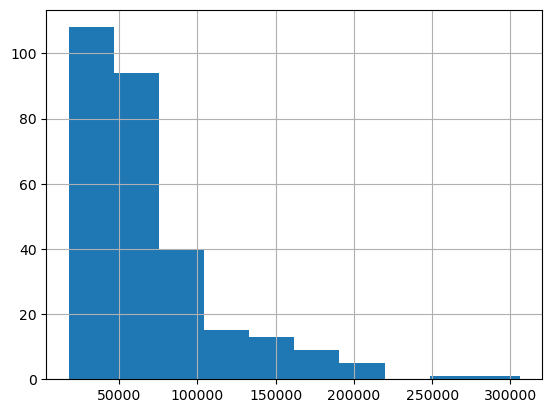

In [247]:
df["curr_price"].hist()

In [249]:
import matplotlib.pyplot as plt

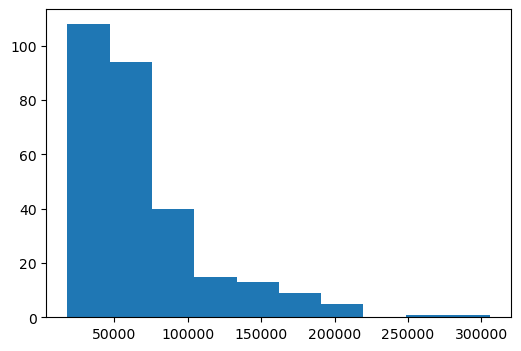

In [251]:
plt.figure(figsize=(6, 4))
plt.hist(df["curr_price"], bins=10)
plt.show()

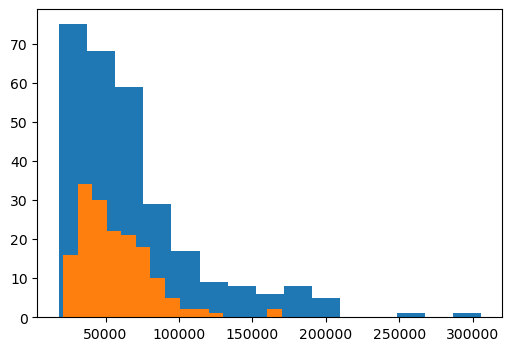

In [252]:
plt.figure(figsize=(6, 4))
plt.hist(df["curr_price"], bins=15)
plt.hist(df["prev_price"], bins=15)
plt.show()

In [253]:
import seaborn as sns

<Axes: xlabel='curr_price', ylabel='Count'>

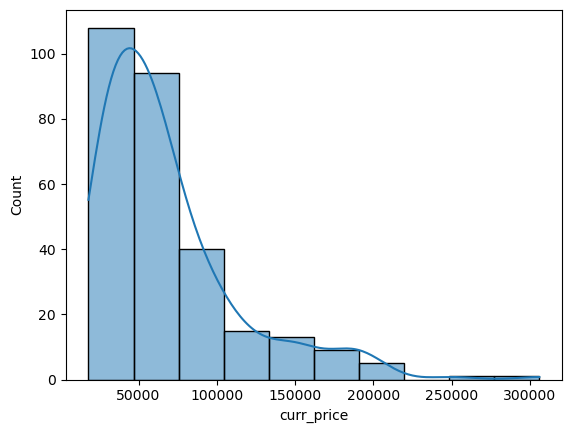

In [254]:
sns.histplot(df["curr_price"], kde=True, bins=10)

<Axes: xlabel='type'>

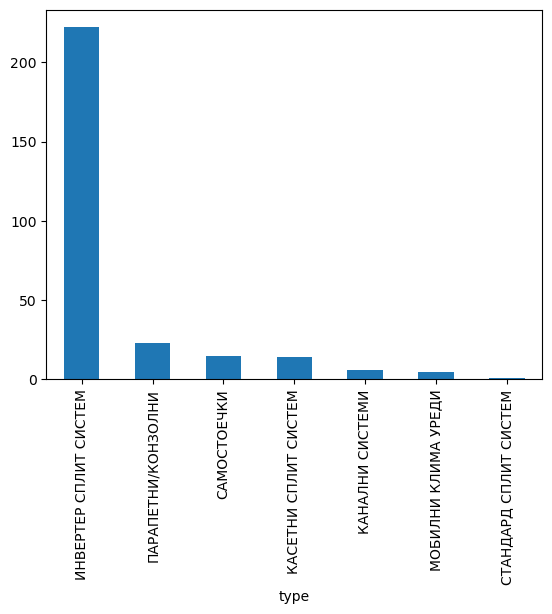

In [255]:
df["type"].value_counts().plot.bar()

In [256]:
counts_per_type = df["type"].value_counts()

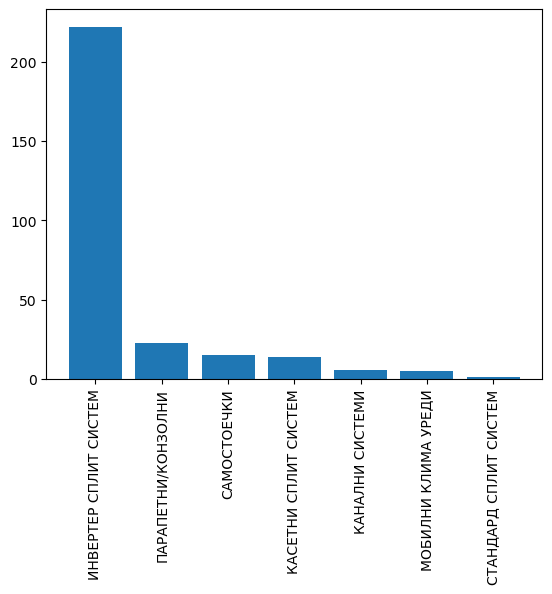

In [257]:
plt.bar(counts_per_type.index, counts_per_type)
plt.xticks(rotation=90)
plt.show()

<Axes: >

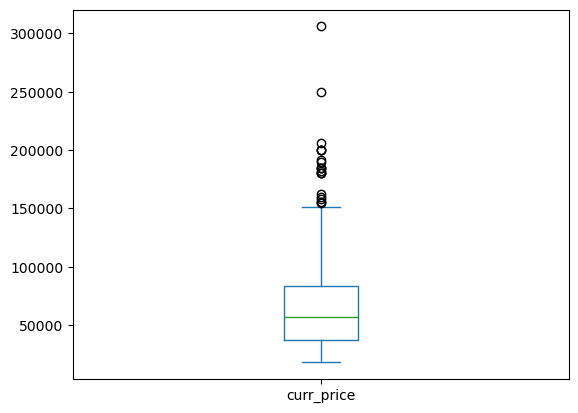

In [258]:
df["curr_price"].plot.box()

{'whiskers': [<matplotlib.lines.Line2D at 0x1d0806e51d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d0806e5450>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d0806e5090>],
 'medians': [<matplotlib.lines.Line2D at 0x1d0806e56d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d0806e5810>],
 'means': []}

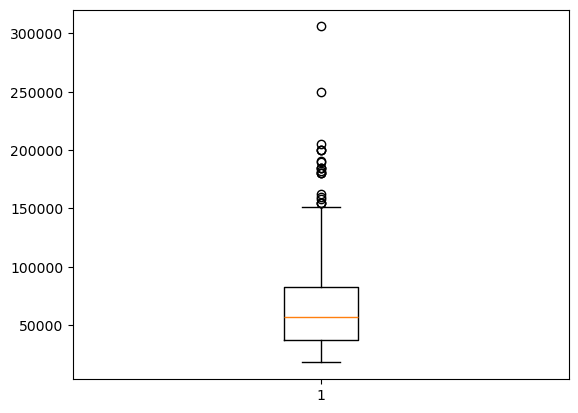

In [259]:
plt.boxplot(df["curr_price"])

<Axes: xlabel='curr_price', ylabel='type'>

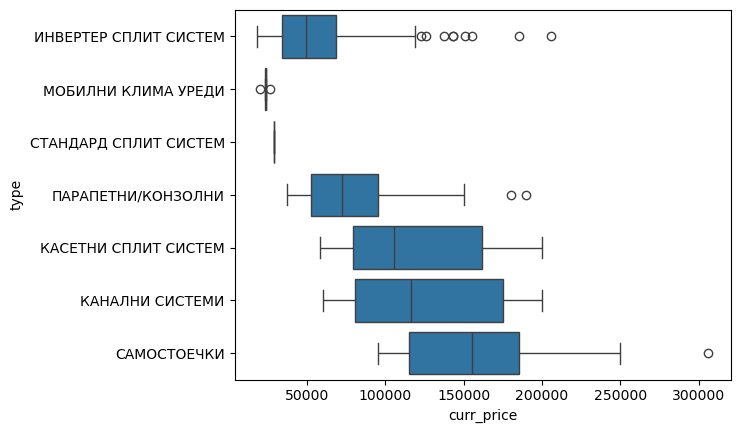

In [260]:
sns.boxplot(df, x="curr_price", y="type")

<Axes: xlabel='curr_price', ylabel='brand'>

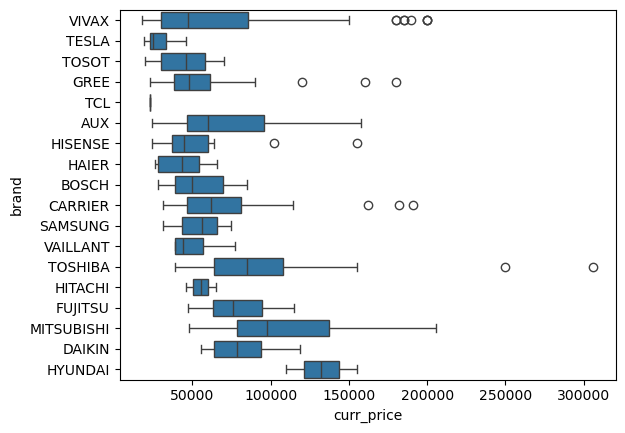

In [261]:
sns.boxplot(df, x="curr_price", y="brand")

<Axes: xlabel='curr_price', ylabel='prev_price'>

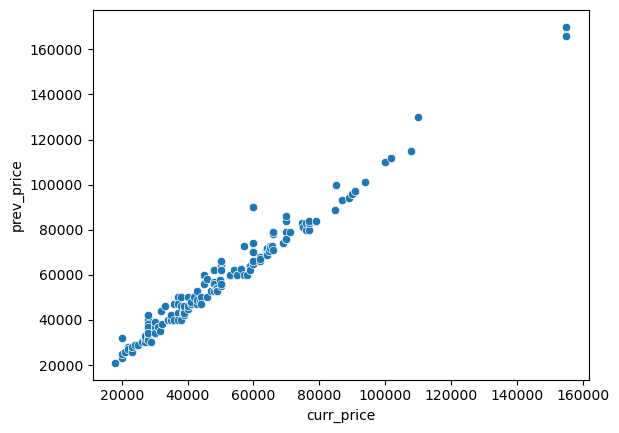

In [262]:
sns.scatterplot(df, x="curr_price", y="prev_price")

<Axes: xlabel='curr_price', ylabel='max_power'>

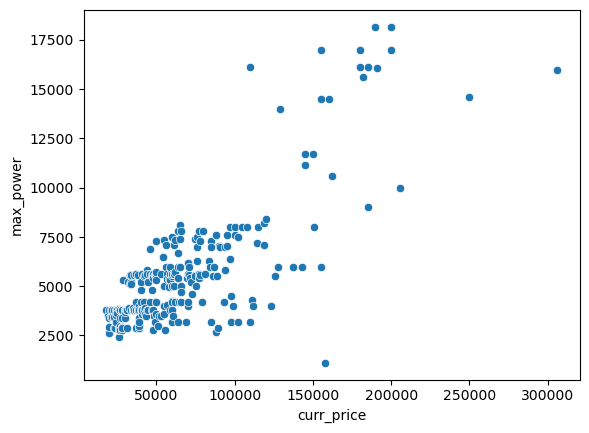

In [263]:
sns.scatterplot(df, x="curr_price", y="max_power")

<Axes: xlabel='curr_price', ylabel='max_temp'>

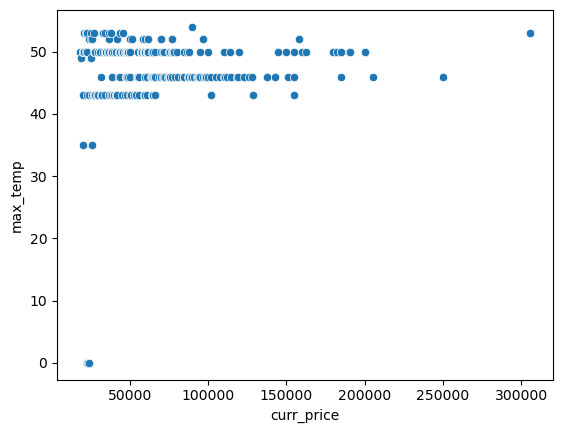

In [264]:
sns.scatterplot(df, x="curr_price", y="max_temp")

<Axes: >

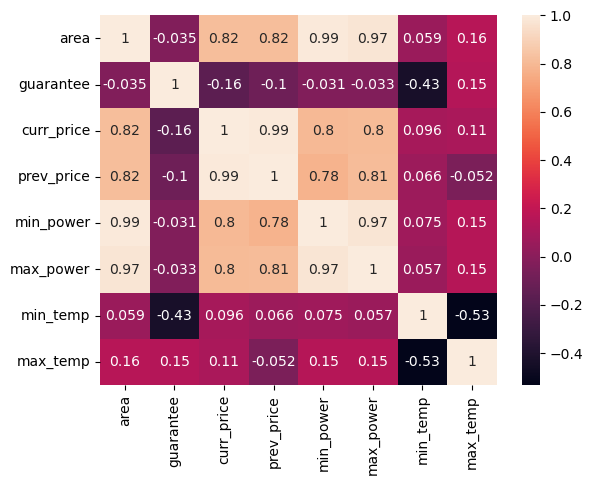

In [265]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [266]:
df.groupby(by=["type"])[["curr_price", "prev_price"]].mean()

,curr_price,prev_price
type,,
ИНВЕРТЕР СПЛИТ СИСТЕМ,56080.135135,54879.480519
КАНАЛНИ СИСТЕМИ,125990.000000,NaN
КАСЕТНИ СПЛИТ СИСТЕМ,120769.285714,NaN
МОБИЛНИ КЛИМА УРЕДИ,23310.000000,NaN
ПАРАПЕТНИ/КОНЗОЛНИ,84952.173913,55490.000000
САМОСТОЕЧКИ,162187.333333,144490.000000
СТАНДАРД СПЛИТ СИСТЕМ,28990.000000,29990.000000
